In [4]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
MODELS = ('ED_TCN_25', 'CNN_biLSTM', 'Dilated_TCN_25_more_layers',)
model_names = ('convolutional\nencoder-decoder', 'CNN-biLSTM', 'dilated\nconvolutional')
model_colors = ('green', 'violet', 'orange')

#### bird 2
with 60 seconds of training data

In [6]:
cd /media/ildefonso/HD-LCU3/compare-syl-seg/used_for_SDSC_poster/results_180411_170354/summary_180412_233516

/media/ildefonso/HD-LCU3/compare-syl-seg/used_for_SDSC_poster/results_180411_170354/summary_180412_233516


In [7]:
err_by_model = {}
err_by_model['bird 2'] = joblib.load('y_preds_and_err_for_train_and_test')

#### bird 1
with 60 seconds of training data

In [8]:
cd /media/ildefonso/HD-LCU3/compare-syl-seg/used_for_SDSC_poster/results_180411_170347/summary_180412_233513

/media/ildefonso/HD-LCU3/compare-syl-seg/used_for_SDSC_poster/results_180411_170347/summary_180412_233513


In [9]:
err_by_model['bird 1'] = joblib.load('y_preds_and_err_for_train_and_test')

In [10]:
results = {}
for bird in ('bird 1', 'bird 2'):
    bird_dict = {}
    for model in MODELS:
        this_model_dict = {}
        this_model_dict['test_syl_err_arr'] = np.squeeze(
            err_by_model[bird][model]['test_syl_err_arr']).tolist()
        this_model_dict['test_err_arr'] = np.squeeze(
            err_by_model[bird][model]['test_err_arr']).tolist()
        bird_dict[model] = this_model_dict
    
    results[bird] = bird_dict

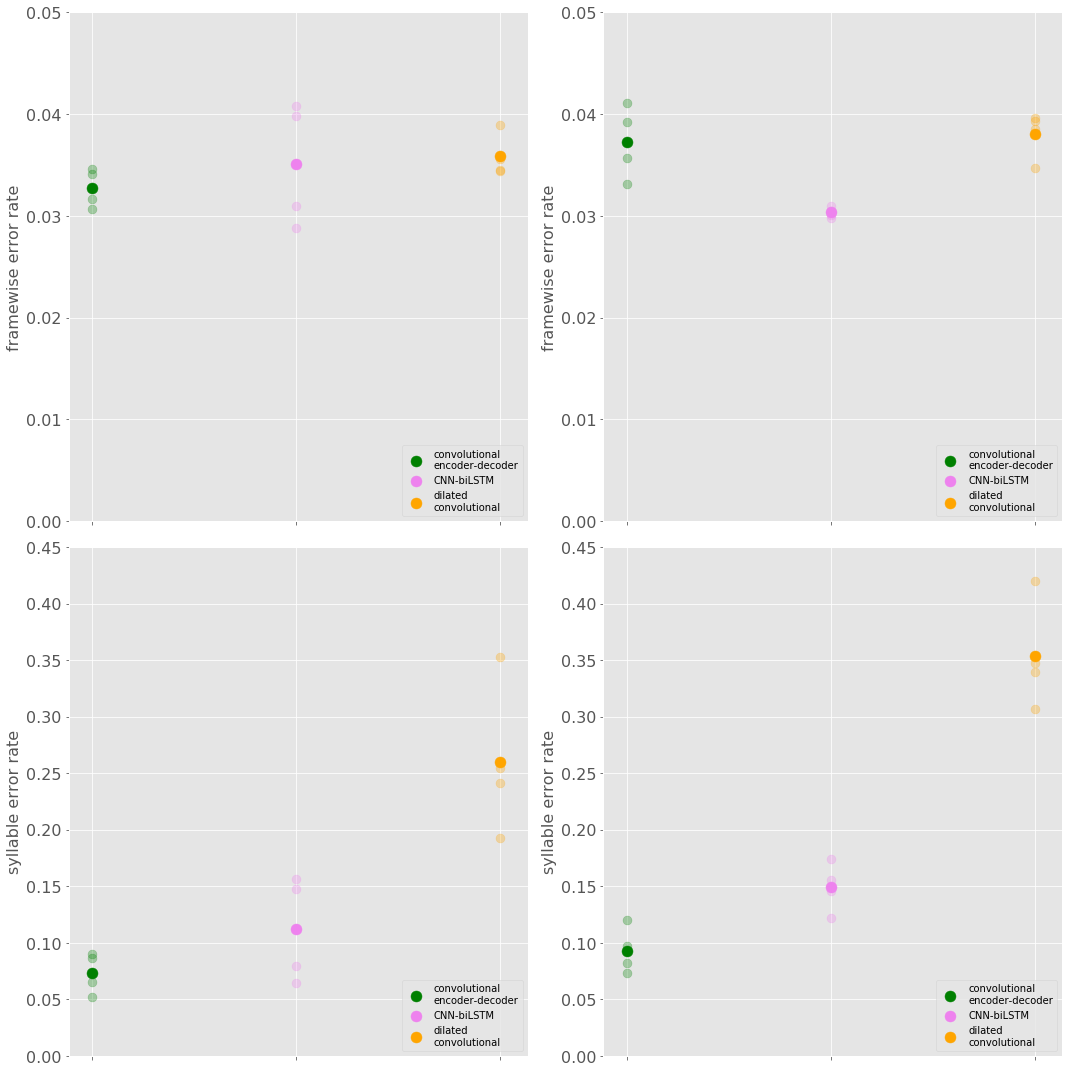

In [11]:
plt.style.use('ggplot')

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 15)
ax = ax.ravel()

for ax_ind, bird in enumerate(('bird 1', 'bird 2')):
    for model_ind, (model, model_name, model_color) in enumerate(zip(MODELS, model_names, model_colors)):
        frame_err = results[bird][model]['test_err_arr']
        syl_err = results[bird][model]['test_syl_err_arr']
        ax[ax_ind].scatter(np.ones((len(frame_err))) * model_ind,
                           frame_err, color=model_color, alpha=0.3, s=80)
        ax[ax_ind].scatter(model_ind,np.mean(frame_err),
                           color=model_color,s=120, label=model_name)
        ax[ax_ind].set_ylim([0,0.05])
        ax[ax_ind].legend(loc='lower right')
        ax[ax_ind].set_ylabel('framewise error rate', fontsize=16)
        ax[ax_ind].set_xticks(range(len(model_names)))
        ax[ax_ind].set_xticklabels([])
        #ax[ax_ind].set_xticklabels(model_names, rotation=40)
        ax[ax_ind].tick_params(labelsize=16)
        
        ax[ax_ind+2].scatter(np.ones((len(syl_err))) * model_ind,
                   syl_err, color=model_color, alpha=0.3, s=80)
        ax[ax_ind+2].scatter(model_ind,np.mean(syl_err),
                           color=model_color,s=120, label=model_name)
        ax[ax_ind+2].set_ylim([0,0.45])
        ax[ax_ind+2].legend(loc='lower right')
        ax[ax_ind+2].set_ylabel('syllable error rate', fontsize=16)
        ax[ax_ind+2].set_xticks(range(len(model_names)))
        ax[ax_ind+2].set_xticklabels([])
        ax[ax_ind+2].tick_params(labelsize=16)

plt.tight_layout()
plt.savefig('frame_syl_error.eps')
plt.savefig('frame_syl_error.png')

## earlier experiments using less data

In [ ]:
results = {}
for bird in ('bird 1', 'bird 2'):
    bird_dict = {}
    for model in MODELS:
        this_model_dict = {}
        this_model_dict['test_syl_err_arr'] = np.squeeze(
            err_by_model[bird][model]['test_syl_err_arr']).tolist()
        this_model_dict['test_err_arr'] = np.squeeze(
            err_by_model[bird][model]['test_err_arr']).tolist()
        bird_dict[model] = this_model_dict
    
    results[bird] = bird_dict

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 15)
ax = ax.ravel()

for ax_ind, bird in enumerate(('bird 1', 'bird 2')):
    for model_ind, (model, model_name, model_color) in enumerate(zip(MODELS, model_names, model_colors)):
        frame_err = results[bird][model]['test_err_arr']
        syl_err = results[bird][model]['test_syl_err_arr']
        ax[ax_ind].scatter(np.ones((len(frame_err))) * model_ind,
                           frame_err, color=model_color, alpha=0.3, s=80)
        ax[ax_ind].scatter(model_ind,np.mean(frame_err),
                           color=model_color,s=120, label=model_name)
        ax[ax_ind].set_ylim([0,0.05])
        ax[ax_ind].legend(loc='lower right')
        ax[ax_ind].set_ylabel('framewise error rate', fontsize=16)
        ax[ax_ind].set_xticks(range(len(model_names)))
        ax[ax_ind].set_xticklabels([])
        #ax[ax_ind].set_xticklabels(model_names, rotation=40)
        ax[ax_ind].tick_params(labelsize=16)
        
        ax[ax_ind+2].scatter(np.ones((len(syl_err))) * model_ind,
                   syl_err, color=model_color, alpha=0.3, s=80)
        ax[ax_ind+2].scatter(model_ind,np.mean(syl_err),
                           color=model_color,s=120, label=model_name)
        ax[ax_ind+2].set_ylim([0,0.45])
        ax[ax_ind+2].legend(loc='lower right')
        ax[ax_ind+2].set_ylabel('syllable error rate', fontsize=16)
        ax[ax_ind+2].set_xticks(range(len(model_names)))
        ax[ax_ind+2].set_xticklabels([])
        ax[ax_ind+2].tick_params(labelsize=16)

plt.tight_layout()
plt.savefig('frame_syl_error.eps')
plt.savefig('frame_syl_error.png')